In [1]:
from sklearn import tree #匯入決策樹模組
from sklearn.datasets import load_iris # 匯入鳶尾花資料集模組
from sklearn.model_selection import train_test_split # 匯入切分資料用的函式

# 讀入鳶尾花資料
iris = load_iris() # 載入內建的鳶尾花資料集
iris_data = iris.data # 特徵資料（花萼與花瓣長度與寬度，共4個特徵）
iris_label = iris.target # 標籤資料（0: setosa, 1: versicolor, 2: virginica）

# 切分訓練與測試資料
train_data, test_data, train_label, test_label = train_test_split(iris_data, iris_label, test_size = 0.3)
# 不設定 random_state，每次執行資料分配會不同
# 建立分類器
clf = tree.DecisionTreeClassifier() # 建立分類器物件
iris_clf = clf.fit(train_data, train_label) # 將訓練資料餵給分類器進行訓練

print("訓練資料正確率:",clf.score(train_data,train_label)) # 訓練資料正確率
print("測試資料正確率:",clf.score(test_data, test_label)) # 測試資料正確率

predict=clf.predict(test_data) # 預測
print("標準答案:",test_label) # 標準答案
print("預測答案:",predict) # 預測答案

訓練資料正確率: 1.0
測試資料正確率: 0.9555555555555556
標準答案: [2 1 2 2 1 1 0 1 0 1 1 1 0 0 2 0 0 0 1 2 2 1 0 0 0 0 1 2 0 1 2 1 1 0 1 0 2
 0 0 1 1 0 1 2 0]
預測答案: [2 1 2 2 1 1 0 1 0 1 1 1 0 0 2 0 0 0 1 1 2 1 0 0 0 0 1 2 0 1 2 1 1 0 1 0 1
 0 0 1 1 0 1 2 0]


In [2]:

import graphviz # 匯入 graphviz 套件，用來視覺化決策樹
dot_data = tree.export_graphviz(clf, out_file=None)  # 使用 export_graphviz 將決策樹模型 clf 匯出成 DOT 語言
graph = graphviz.Source(dot_data) # 將 dot_data（DOT 格式的文字）轉換為 Graphviz 的圖形物件
graph.render("iris") #將結果存成pdf檔案

'iris.pdf'

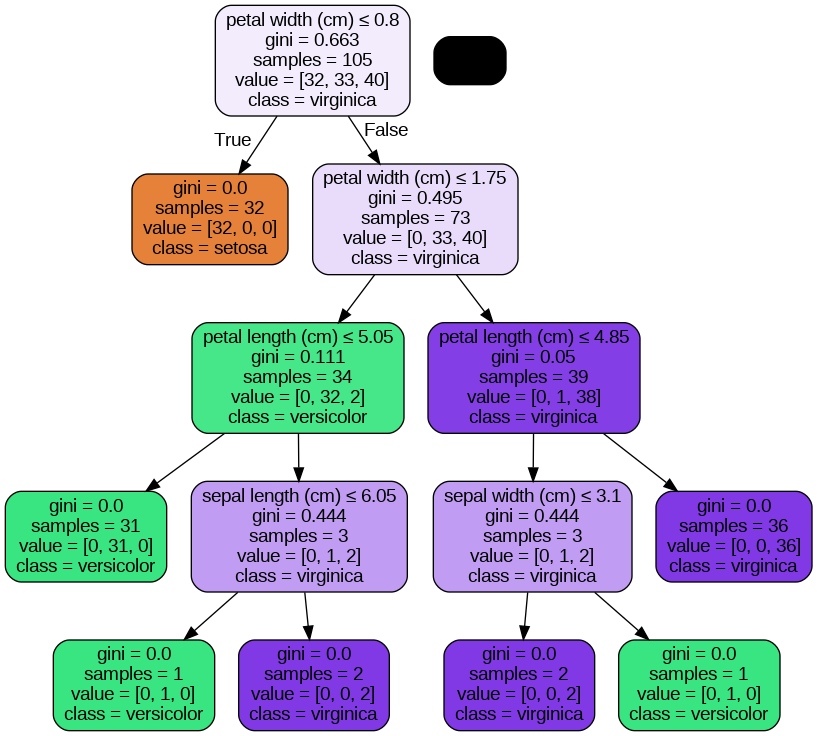

In [3]:
import pydotplus  # 匯入 pydotplus 模組，用來處理 DOT 格式並產生圖形
from IPython.display import Image  # 從 IPython 套件中匯入 Image，用來在 notebook 中直接顯示圖片
dot_data = tree.export_graphviz(clf, out_file=None, # 訓練好的決策樹模型
                feature_names=iris.feature_names,# 顯示特徵名稱
                class_names=iris.target_names, # 顯示類別名稱
                filled=True, rounded=True, # 以顏色區分節點所屬的類別 節點邊角設為圓角
                special_characters=True) # 支援特殊字元，避免轉換問題
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  #將結果用圖形化呈現